In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Customer Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### This is run 2nd time after changing the datatype value to float

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Replacing blanks with 0 as tenure is 0 and no total charges are recorded.

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [7]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
df["customerID"].duplicated().sum()

np.int64(0)

In [14]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

#converted 0 & 1 for senior citizen to yes/no for better understanding

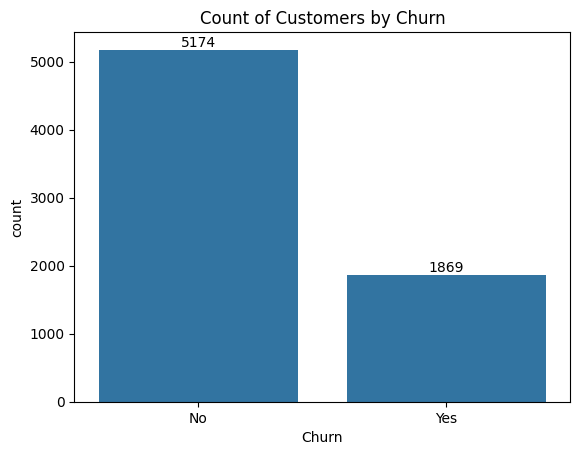

In [24]:
ax = sns.countplot(x = 'Churn', data = df )

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

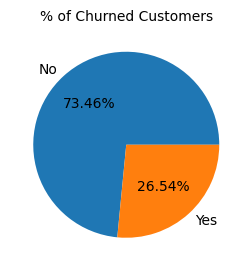

In [26]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':'count'})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("% of Churned Customers", fontsize = 10)
plt.show()

#form this pie chart we get to know that 26.54% of our customers hae churned out others are still with us. so let's explore the reason behind the churned customers. 

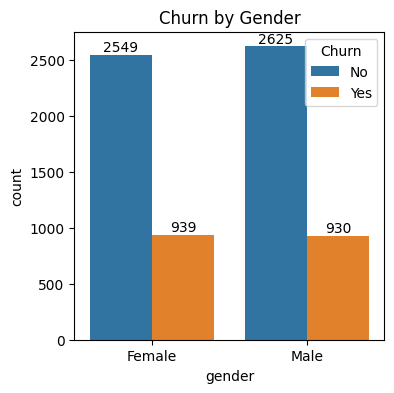

In [35]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "gender", data = df, hue = "Churn" )
plt.title("Churn by Gender")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

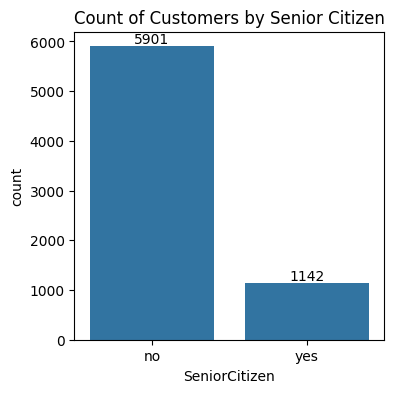

In [38]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df )
plt.title("Count of Customers by Senior Citizen")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

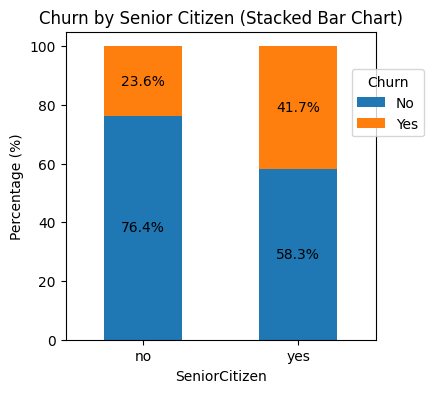

In [37]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots(figsize=(4, 4)) 

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))  # Customize legend location

plt.show()

### Comparative a greater % of people in SeniorCitizen category have churned

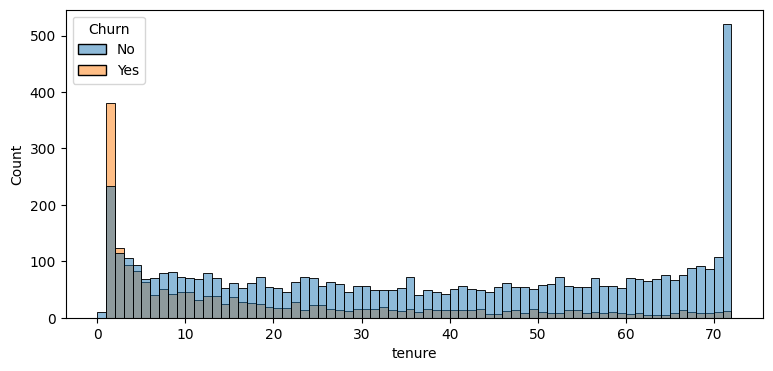

In [61]:
plt.figure(figsize = (9,4))
ax = sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

## People who have used our services for a long time have stayed and people who have used our sevices 1 or 2 months have churned

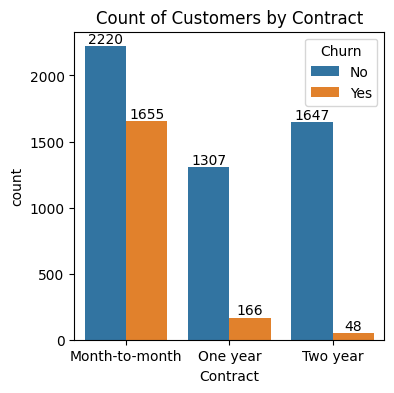

In [47]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Count of Customers by Contract")
plt.show()

##### People who have month to month contract are likely to churn

In [48]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

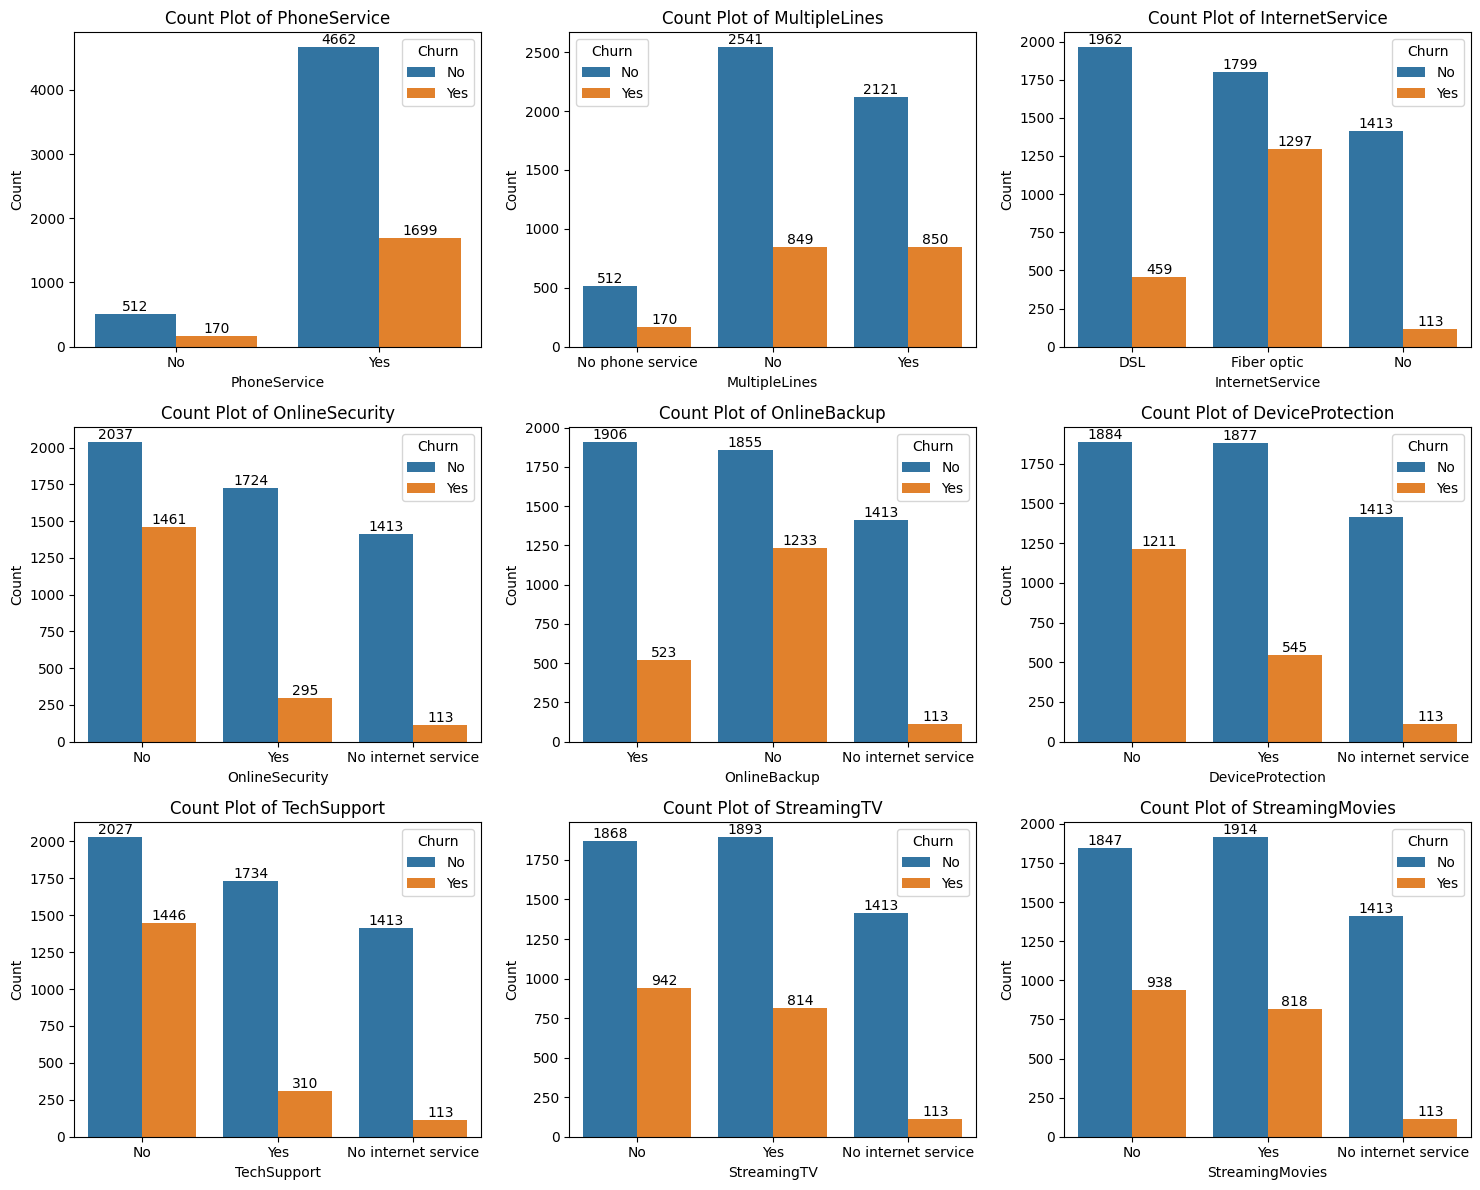

In [53]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten for easy iteration

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    ax = axes[i]
    sns.countplot(x=col, data=df, ax=ax, hue=df["Churn"])
    ax.set_title(f'Count Plot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

    # Add count labels on bars
    for container in ax.containers:
        ax.bar_label(container)

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Explanation of Graphs:
## 1. PhoneService: Shows the distribution of customers who have a phone service vs. those who don't.
###   - If churn is higher among those **without** phone service, this suggests that lack of service might increase churn.
###  - If churn is similar in both categories, phone service may not be a major factor in churn.

## 2. MultipleLines: Analyzes whether having multiple phone lines impacts churn.
###    - If customers with **only one line** churn more, offering multiple lines might improve retention.
###    - If customers with **multiple lines** churn more, it could indicate dissatisfaction.

## 3. InternetService: Compares churn rates across different internet types (DSL, Fiber Optic, No Internet).
###    - If **Fiber Optic** has the highest churn, it may indicate dissatisfaction with speed, price, or service.
###    - If **DSL** has higher churn, it could suggest slower speeds or poor service lead to churn.

## 4. OnlineSecurity: Checks whether having online security services reduces churn.
###    - If churn is **higher** for customers **without** security, adding security features might improve retention.
###    - If churn is balanced, security services may not strongly influence customer decisions.

## 5. OnlineBackup: Evaluates the role of backup services in churn behavior.
###    - If churn is higher for customers **without** online backup, this suggests that backup services help retain customers.
###    - If churn rates are similar, backup services may not play a key role in customer retention.

## 6. DeviceProtection: Analyzes whether having a device protection plan affects churn.
###   - If customers **without protection** churn more, it might indicate that protection services enhance customer loyalty.
###    - If churn is balanced, device protection may not be a major churn factor.

## 7. TechSupport: Examines whether having technical support reduces churn.
###    - If churn is **higher** among those **without Tech Support**, it suggests that customer support helps retention.
###    - If churn is similar, tech support may not be a strong determinant of customer loyalty.

## 8. StreamingTV: Investigates if offering streaming TV services affects customer retention.
###    - If churn is **higher** for customers **without** StreamingTV, this suggests that it helps retain customers.
###    - If churn is **higher** for those **with StreamingTV**, dissatisfaction with content/service could be a factor.

## 9. StreamingMovies: Similar to StreamingTV, this evaluates the impact of streaming movie services.
###    - If churn is **higher** for customers **without** StreamingMovies, it may indicate that entertainment services help retention.
###    - If churn is **higher** for those **with** StreamingMovies, it may suggest dissatisfaction with the service.

# Overall Insights:
### - Customers without **OnlineSecurity, TechSupport, and DeviceProtection** might churn more.
### - **Fiber Optic internet** may have a higher churn rate, potentially indicating customer dissatisfaction.
### - Streaming services may influence churn rates depending on service quality and customer experience.
### - These insights can help businesses focus on improving services that reduce customer churn.

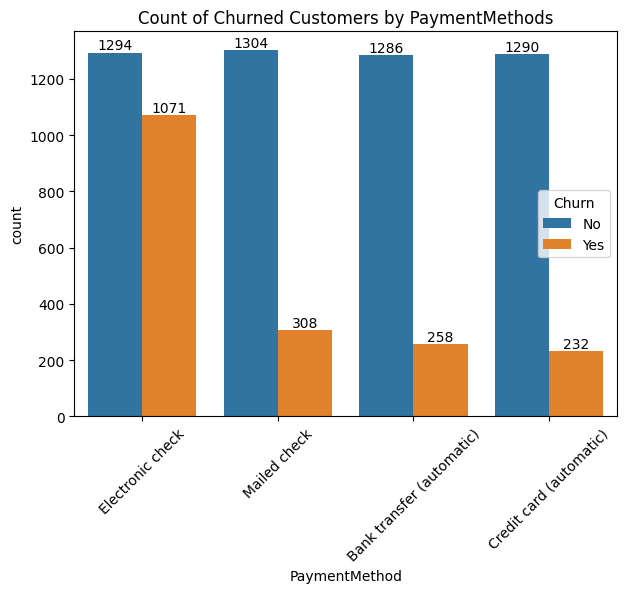

In [57]:
plt.figure(figsize = (7,5))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Count of Churned Customers by PaymentMethods")
plt.xticks(rotation = 45)
plt.show()